In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

def conv(s):
    idx = -1
    for i,c in enumerate(s):
        if c!='.' and not c.isnumeric():
            idx = i
            break
#     print(s[idx])
    unit = s[idx:]
    num = float(s[:idx])
    if unit =='s':
        num=num*1000

    return num

def pt_values(yvals,ax,**kwargs):
    N = len(yvals)
    X2 = np.sort(yvals)
    F2 = np.array(np.arange(N))/float(N)
    
    s = kwargs.pop('start',0)
    e = kwargs.pop('end',1)
    
    start=int(len(F2)*s)
    end=int(len(F2)*e)
    
    xvals = X2[start:end]
    yvals = F2[start:end]
    ax.plot(xvals,yvals,**kwargs)
    
def pt(fn, ax, **kwargs):
    df = pd.read_csv(fn, header=None)
    df['float_lat'] = df[0].apply(conv)
    yvals = df['float_lat'].to_numpy()
    pt_values(yvals, ax, **kwargs)

    
    
def get_box(fn, **kwargs):
    df = pd.read_csv(fn, header=None)
    df['float_lat'] = df[0].apply(conv)
    return df['float_lat']

    

{'whiskers': [<matplotlib.lines.Line2D at 0x10bc0cd90>,
 'caps': [<matplotlib.lines.Line2D at 0x10845d190>,
 'boxes': [<matplotlib.lines.Line2D at 0x10bbff450>,
 'medians': [<matplotlib.lines.Line2D at 0x10bb88510>,
 'fliers': [],
 'means': []}

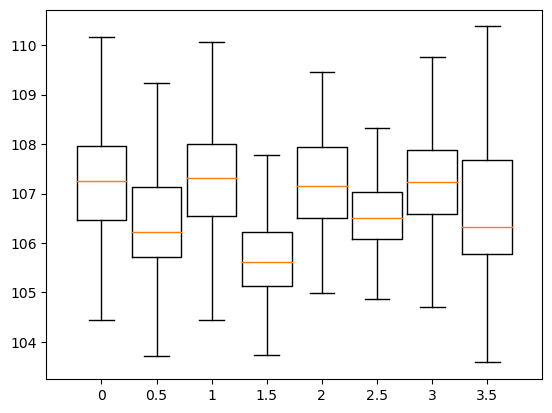

In [47]:
fig, ax = plt.subplots()
hosts = ['clabsvr','clabcl0','clabcl1','clabcl2']

# boxes = []
# for i,ax in enumerate(axs.flat):
#     box = get_box(f'../feodata/clab-178922/run_load/federated/{hosts[i]}/2.out')
#     boxes.append(box)
# ax.boxplot(boxes)

boxes = []
for i,_ in enumerate(hosts):
    box = get_box(f'../feodata/clab-178922/run_load/roundrobin/{hosts[i]}/2.out')
    boxes.append(box)
ax.boxplot(boxes, positions=np.arange(4), showfliers=False)

boxes = []
for i,_ in enumerate(hosts):
    box = get_box(f'../feodata/clab-178922/run_load/federated/{hosts[i]}/2.out')
    boxes.append(box)
ax.boxplot(boxes, positions=np.arange(4)+0.5, showfliers=False)

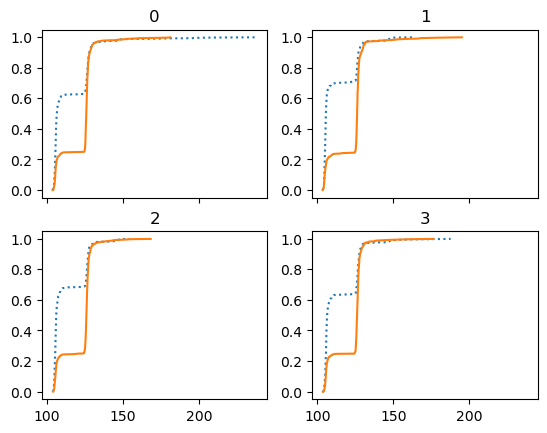

In [95]:
fig, axs = plt.subplots(2,2, sharex=True)
hosts = ['clabsvr','clabcl0','clabcl1','clabcl2']

for i,ax in enumerate(axs.flat):
    ax.set_title(i)
    pt(f'../feodata/clab-181357/run_load/federated/{hosts[i]}/profile8-p2p20ms.out',ax,linestyle='dotted')
for i,ax in enumerate(axs.flat):
    pt(f'../feodata/clab-181357/run_load/roundrobin/{hosts[i]}/profile8-p2p20ms.out',ax)
    
    


(0.9, 1.0)

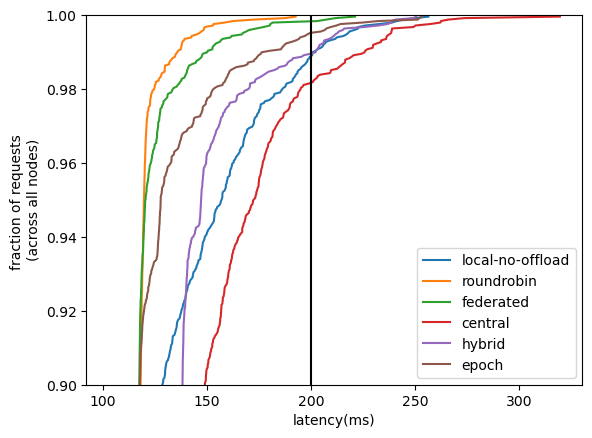

In [139]:
fig, ax = plt.subplots()
pols = ['base','roundrobin','federated','central','hybrid','epoch']

for pol in pols:
    total = []
    for i,_ in enumerate(hosts):
        box = get_box(f'../feodata/clab-181357/run_load/{pol}/{hosts[i]}/profile8-p2p10ms.out')
        total = np.concatenate((total,box))
    pt_values(total, ax)

pols[0]='local-no-offload'
ax.legend(pols)
ax.set_ylabel('fraction of requests \n(across all nodes)')
ax.set_xlabel('latency(ms)')
ax.axvline(x=200, color='black')
ax.set_ylim(0.90,1)

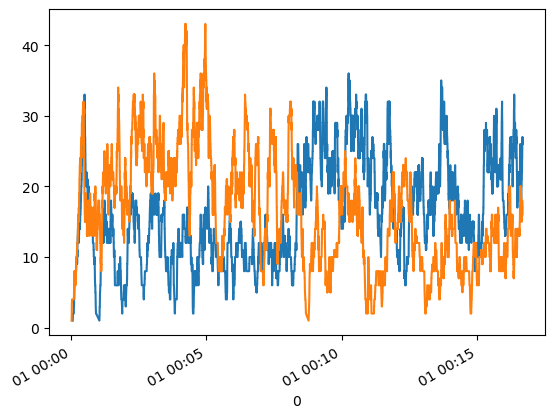

In [125]:
import numpy as np
import json

def visualize_rate(filename, ax):
    s1 = np.load(filename)
    df1 = pd.DataFrame()
    df1[0] = pd.to_datetime(s1.cumsum(), unit='s')
    df1 = df1.set_index(0)
    df1[1] = np.ones(len(df1))
    df1[1].rolling('1s').count().plot(ax=ax)

fig,ax = plt.subplots()

# visualize_rate('../loadgen/var_lam_loads_2rps/site1/traffic_dur1000_lam0.6_stime10_rate2.0_site1.npy', ax)
# visualize_rate('../loadgen/var_lam_loads_2rps/site2/traffic_dur1000_lam0.6_stime10_rate2.0_site2.npy',ax)
# visualize_rate('../loadgen/var_lam_loads_2rps/site3/traffic_dur1000_lam0.6_stime10_rate2.0_site3.npy',ax)
# visualize_rate('../loadgen/var_lam_loads_2rps/site4/traffic_dur1000_lam0.6_stime10_rate2.0_site4.npy',ax)
# visualize_rate('../loadgen/traffic_dur1000_lam0.6_stime10_rate2.0_site1.npy',ax)
# visualize_rate('../loadgen/traffic_dur1000_lam0.5_stime10_rate2.0_site1.npy',ax)

visualize_rate('../loadgen/lam_varies/traffic_dur1000_lam0.5-1.0_stime10_rate2.0_site1.npy',ax)
visualize_rate('../loadgen/lam_varies/traffic_dur1000_lam1.0-0.5_stime10_rate2.0_site1.npy', ax)

# visualize_rate('../loadgen/traffic_dur1000_lam0.4_stime10_rate2.0_site1.npy',ax)

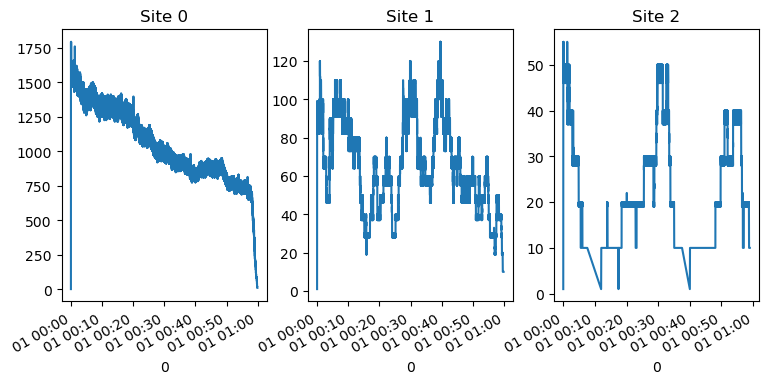

In [141]:
fig,axs = plt.subplots(1,3, figsize=(9,4))
for i,ax in enumerate(axs.flat):
    visualize_rate(f'../loadgen/sfcabs-load-site{i}.npy',ax)
    ax.set_title(f'Site {i}')



In [133]:
df = pd.read_csv('../feodata/clab-178922/test/filtered-clabsvr', sep='|',header=None)
# df['qlen']=df['json'].apply(lambda x: json.loads(x))
df['qlen'] = df[1].apply(lambda x : json.loads(x)['qlen'])

0
192.168.10.10:9696    Axes(0.547727,0.11;0.352273x0.77)
192.168.10.11:9696    Axes(0.547727,0.11;0.352273x0.77)
192.168.10.12:9696    Axes(0.547727,0.11;0.352273x0.77)
Name: qlen, dtype: object

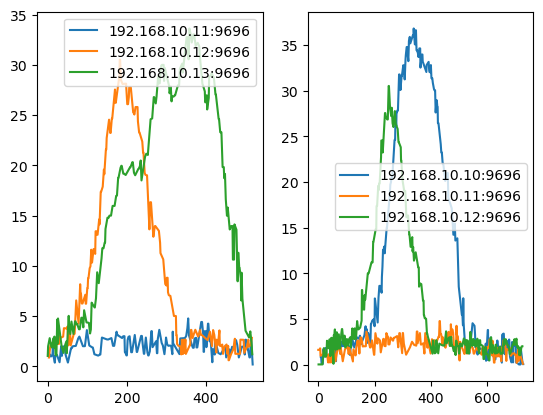

In [134]:
fig,ax = plt.subplots(1,2) 
df.groupby(0)['qlen'].plot(ax=ax[0], legend=True)


df = pd.read_csv('../feodata/clab-178922/test/filtered-clabcl2', sep='|',header=None)
# df['qlen']=df['json'].apply(lambda x: json.loads(x))
df['qlen'] = df[1].apply(lambda x : json.loads(x)['qlen'])
df.groupby(0)['qlen'].plot(ax=ax[1], legend=True)


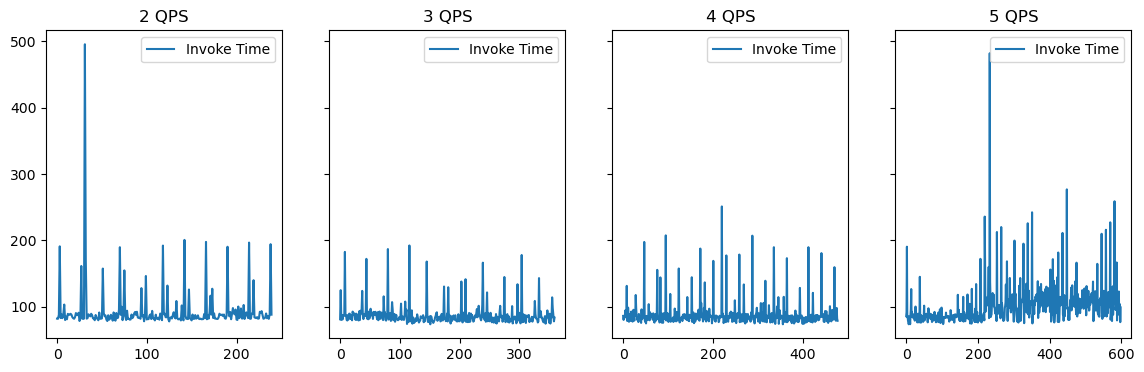

In [28]:
def plot_real(fn, ax):
    df = pd.read_csv(fn, header=None, sep=' ')
    df['e2e'] = df[0].apply(conv)
    df['it'] = df[1].astype('float')
#     df['e2e'].plot(ax=ax)
    df['it'].plot(ax=ax)
    ax.legend(['Invoke Time'])
    
fig,axs = plt.subplots(1,4,sharey=True, figsize=(14,4))
for i,ax in enumerate(axs.flat):
    plot_real(f'../feodata/clab-181357/qps{2+i}_1.out',ax) 
    ax.set_title(f'{2+i} QPS')

Text(0.5, 1.0, '6 QPS')

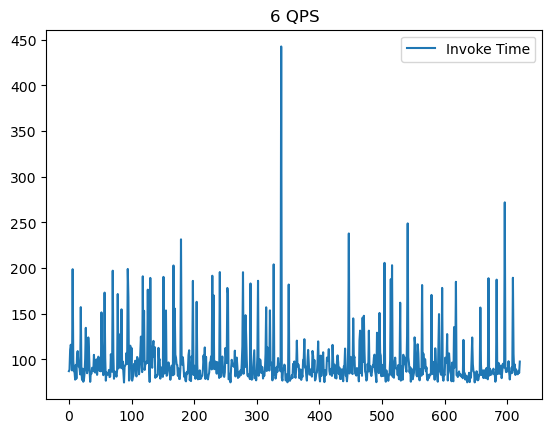

In [31]:
fig,ax = plt.subplots()
plot_real(f'../feodata/clab-181357/qps6_1.out',ax) 
ax.set_title('6 QPS')

Text(0.5, 1.0, 'Azure VM')

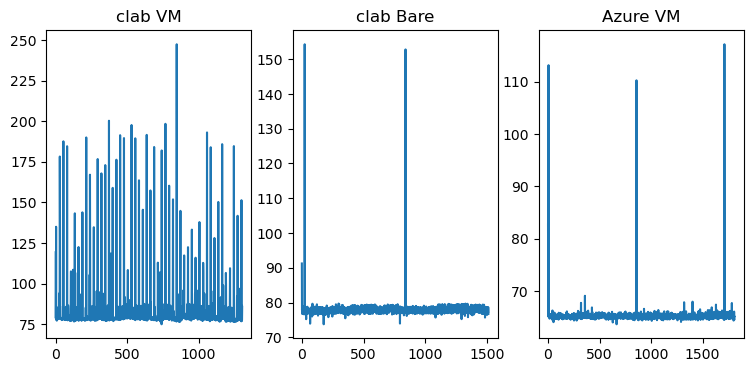

In [137]:
fig,axs = plt.subplots(1,3, figsize=(9,4))
boxes = []
ax = axs[0]
df = pd.read_csv('../feodata/clab-181357/bare1.out', header=None)
df['it'] = df[0].astype('float')
df['it'].plot(ax=ax)
boxes.append(df['it'])
ax.set_title('clab VM')

ax = axs[1]
df = pd.read_csv('../feodata/clab-181357/bare2.out', header=None)
df['it'] = df[0].astype('float')
df['it'].plot(ax=ax)
boxes.append(df['it'])
ax.set_title('clab Bare')


ax = axs[2]
df = pd.read_csv('../feodata/clab-181357/azurebare.out', header=None)
df['it'] = df[0].astype('float')
df['it'].plot(ax=ax)
boxes.append(df['it'])
ax.set_title('Azure VM')





{'whiskers': [<matplotlib.lines.Line2D at 0x10cfc6290>,
 'caps': [<matplotlib.lines.Line2D at 0x10cfc6550>,
 'boxes': [<matplotlib.lines.Line2D at 0x10fec2550>,
 'medians': [<matplotlib.lines.Line2D at 0x15e3bd090>,
 'fliers': [<matplotlib.lines.Line2D at 0x10feb72d0>,
 'means': []}

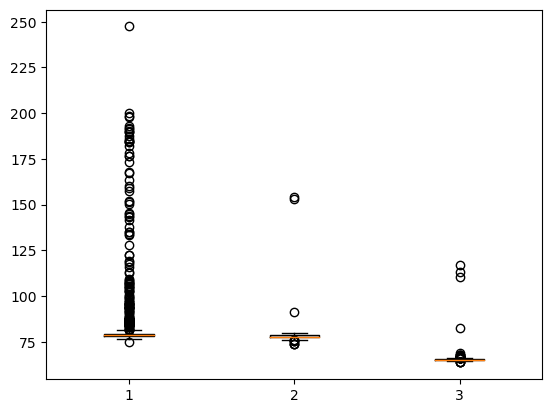

In [133]:
fig,ax = plt.subplots()
ax.boxplot(boxes)
ax.set_xticklabels(['clab VM','clab Bare','Azure VM'])